In [2]:
df=pd.read_csv("car_data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
len(df.Car_Name.unique())

98

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
import seaborn as sns

<AxesSubplot:>

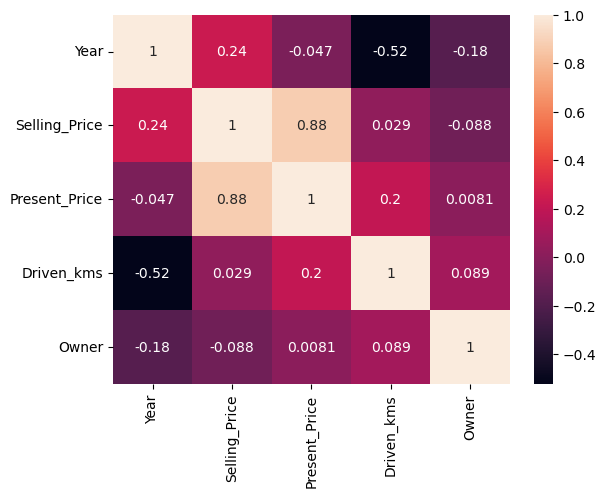

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.Year.unique

<bound method Series.unique of 0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
import pickle

In [16]:
file = open('preprocessor.pkl','wb')
pickle.dump(encoder,file)
file.close()

In [17]:
df['Fuel_Type']=encoder.fit_transform(df['Fuel_Type'])

In [106]:
df['Selling_type']=encoder.fit_transform(df['Selling_type'])

In [107]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [108]:
df['Transmission']=encoder.fit_transform(df['Transmission'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int32  
 6   Selling_type   301 non-null    int32  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 18.9+ KB


In [110]:
df1=df.drop('Car_Name',axis=1)

In [111]:
df1.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

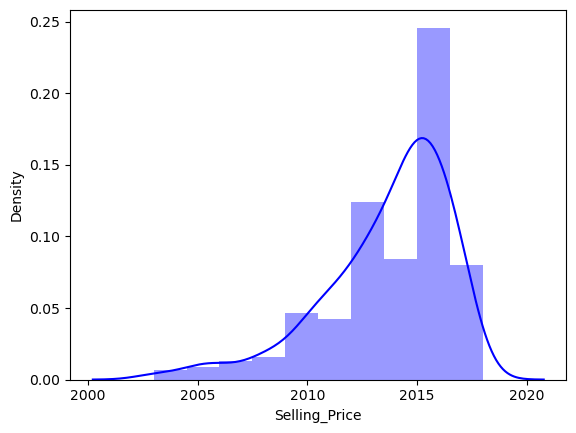

In [112]:
sns.distplot(a=df1.Selling_Price,bins=10,x=df1.Year,rug=False,color='b')

<AxesSubplot:>

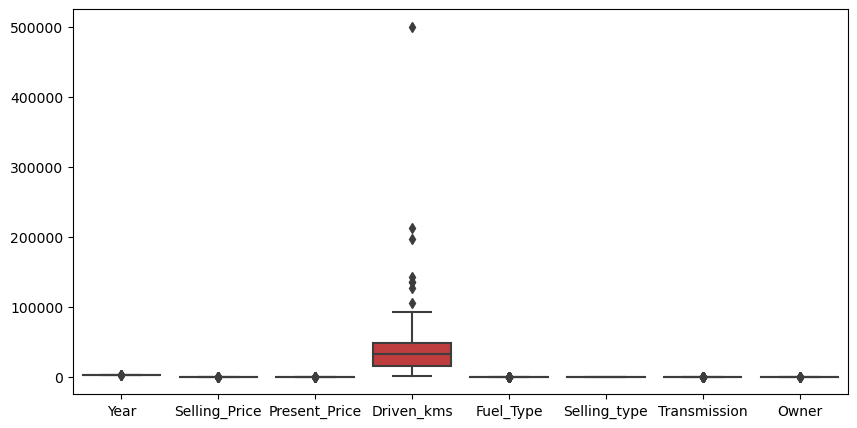

In [113]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1)

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

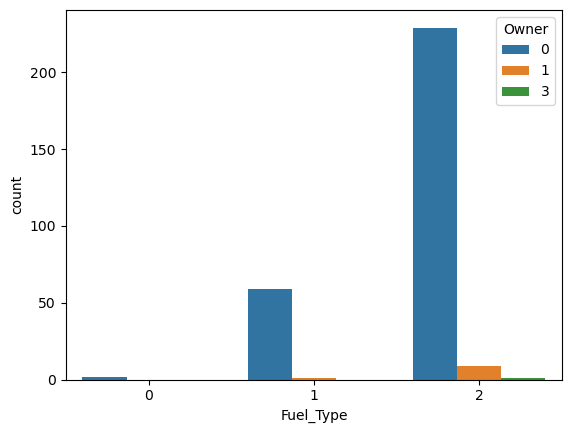

In [114]:
sns.countplot(x='Fuel_Type',data=df1,hue='Owner')

In [115]:
x=df1.drop('Selling_Price',axis=1)

In [116]:
x.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [117]:
y=df1['Selling_Price']

In [118]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [120]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((225, 7), (76, 7), (225,), (76,))

In [121]:
X_train.corr()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,-0.053763,-0.516599,-0.004758,-0.100192,0.012334,-0.179966
Present_Price,-0.053763,1.000000,0.190738,-0.435633,-0.472403,-0.300784,0.038557
Driven_kms,-0.516599,0.190738,1.000000,-0.178861,-0.052098,-0.183410,0.100775
Fuel_Type,-0.004758,-0.435633,-0.178861,1.000000,0.335651,0.079853,0.048310
Selling_type,-0.100192,-0.472403,-0.052098,0.335651,1.000000,0.017143,0.106028
Transmission,0.012334,-0.300784,-0.183410,0.079853,0.017143,1.000000,-0.084946
Owner,-0.179966,0.038557,0.100775,0.048310,0.106028,-0.084946,1.000000


<AxesSubplot:>

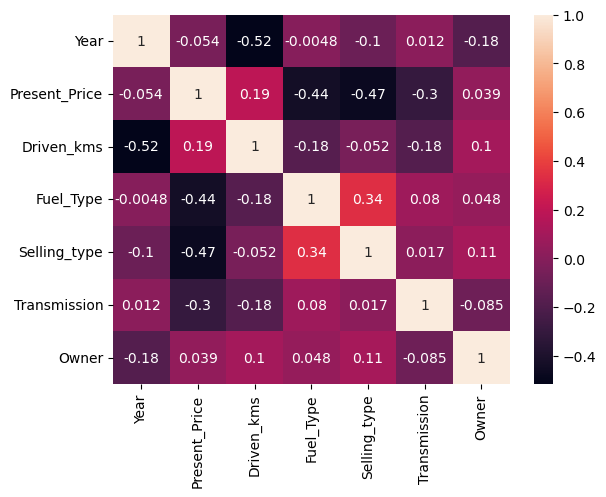

In [122]:
sns.heatmap(X_train.corr(),annot=True)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [126]:
x_train_scaled=scaler.fit_transform(X_train)

In [128]:
x_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

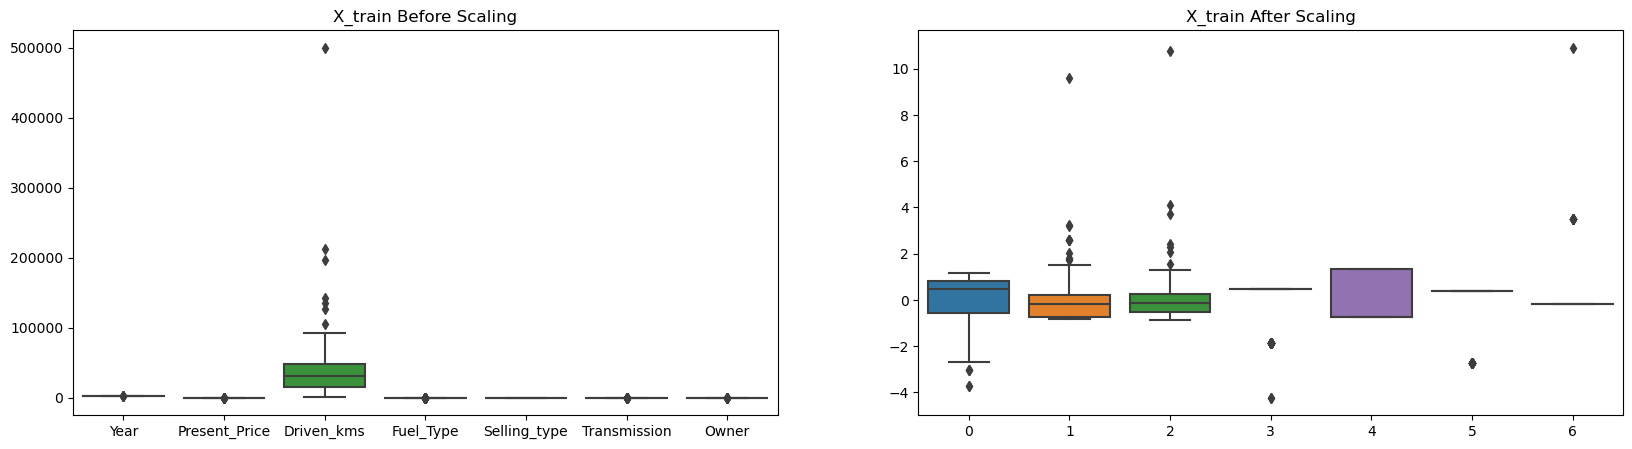

In [130]:
plt.subplots(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train After Scaling')

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()

In [133]:
linreg.fit(x_train_scaled,y_train)


LinearRegression()

In [134]:
y_pred=linreg.predict(x_test_scaled)


In [136]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.2330974094815332
R2 Score 0.875031692613325


In [137]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()


In [139]:
lasso.fit(x_train_scaled,y_train)


Lasso()

In [141]:
y_pred=lasso.predict(x_test_scaled)


In [142]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.9391327059653634
R2 Score 0.717286610459373


In [143]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()


In [145]:
ridge.fit(x_train_scaled,y_train)


Ridge()

In [146]:
y_pred=ridge.predict(x_test_scaled)


In [147]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.2350427609056724
R2 Score 0.8745033869237613


In [148]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()


In [150]:
elastic.fit(x_train_scaled,y_train)


ElasticNet()

In [151]:
y_pred=elastic.predict(x_test_scaled)


In [152]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.79301274185858
R2 Score 0.7120384065184778


In [155]:
import pickle
pickle.dump(scaler,open('Standarrd_scaler.pkl','wb'))
pickle.dump(linreg,open('linear.pkl','wb'))